In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline

# Increasing numNodes

## Total Cost

In [9]:
def fill_dataFrame_total(path, files):
    df_time = pd.DataFrame()
    df_prec = pd.DataFrame()
    df_conv = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = "try_"+file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[0]+','+vals[1]+','+vals[2]
                df_time.loc[row,col] = float(vals[3])
                df_prec.loc[row,col] = int(vals[4])
                df_conv.loc[row,col] = int(vals[5])==1
    return df_time,df_prec,df_conv

### Sequential

In [10]:
path = "../results/total/sequential"
files = sorted(os.listdir(path))

In [11]:
df_seq_time,df_seq_prec,df_seq_conv = fill_dataFrame_total(path,files)

In [12]:
df_seq_time

,try_0,try_1,try_2
"10,10000,5000",0.053687,0.054051,0.054596
"50,10000,5000",0.547339,0.447483,0.525872
"100,10000,5000",1.963346,2.087576,2.235936


In [13]:
df_seq_prec

,try_0,try_1,try_2
"10,10000,5000",112.0,112.0,112.0
"50,10000,5000",1034.0,1192.0,1031.0
"100,10000,5000",2416.0,2293.0,2161.0


In [14]:
df_seq_conv

,try_0,try_1,try_2
"10,10000,5000",True,True,True
"50,10000,5000",True,True,True
"100,10000,5000",True,True,True


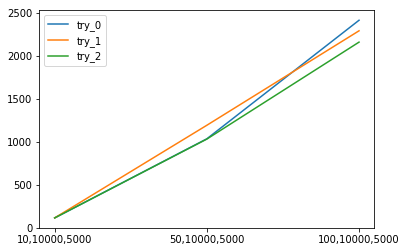

In [15]:
plt.plot(df_seq_prec);
plt.legend(df_seq_prec.columns);

### Parallel

In [16]:
path = "../results/total/parallel"
files = sorted(os.listdir(path))

In [17]:
df_par_time,df_par_prec,df_par_conv = fill_dataFrame_total(path,files)

In [18]:
df_par_time

,try_0,try_1,try_2
"10,10000,5000",0.177972,0.164420,0.188860
"50,10000,5000",0.525436,0.533552,0.481810
"100,10000,5000",1.679427,1.861223,1.880414


In [19]:
df_par_prec

,try_0,try_1,try_2
"10,10000,5000",112.0,112.0,112.0
"50,10000,5000",1219.0,1129.0,1168.0
"100,10000,5000",2380.0,2210.0,2495.0


In [20]:
df_par_conv

,try_0,try_1,try_2
"10,10000,5000",True,True,True
"50,10000,5000",True,True,True
"100,10000,5000",True,True,True


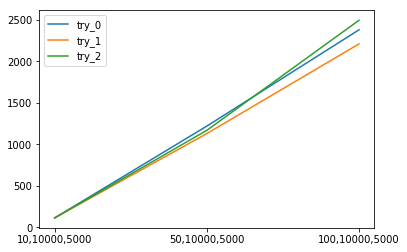

In [21]:
plt.plot(df_par_prec);
plt.legend(df_par_prec.columns);

### Parallel MPI

In [22]:
path = "../results/total/parallelMPI"
files = sorted(os.listdir(path))

In [23]:
df_mpi_time,df_mpi_prec,df_mpi_conv = fill_dataFrame_total(path,files)

In [24]:
df_mpi_time

,try_0,try_1,try_2,try_3
"10,10000,5000",0.558621,0.546203,0.562681,0.549825
"50,10000,5000",1.573003,1.582228,1.561829,1.578248
"100,10000,5000",3.137370,3.140054,3.127392,3.120288


In [25]:
df_mpi_prec

,try_0,try_1,try_2,try_3
"10,10000,5000",181.0,181.0,181.0,181.0
"50,10000,5000",973.0,877.0,927.0,927.0
"100,10000,5000",2423.0,2250.0,2248.0,2423.0


In [26]:
df_mpi_conv

,try_0,try_1,try_2,try_3
"10,10000,5000",True,True,True,True
"50,10000,5000",True,True,True,True
"100,10000,5000",True,True,True,True


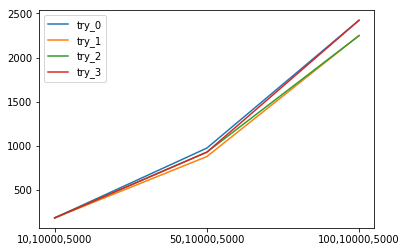

In [27]:
plt.plot(df_mpi_prec);
plt.legend(df_mpi_prec.columns);

## Detailed Cost

In [28]:
def fill_dataFrame_detailed(path, files):
    df = pd.DataFrame()
    for file in files:
        with open(os.path.join(path,file)) as f:
            col = file.split('.')[0]
            for line in f:
                vals = line.split(' ')
                row = vals[0]+','+vals[1]+','+vals[2]
                try:
                    df.loc[row,col] += ' '+vals[3][:-1]
                except KeyError:
                    df.loc[row,col] = vals[3][:-1]
                except TypeError:
                    df.loc[row,col] = vals[3][:-1]
    return df

### Sequential

In [35]:
path = "../results/detailed/sequential"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [36]:
df_gen = fill_dataFrame_detailed(path,genFiles)
df_gen

,generation_0,generation_1,generation_2
"10,10000,5000",0.002075 0.002019 0.002020 0.002010 0.001999 0...,0.002089 0.002042 0.002037 0.002029 0.002017 0...,0.002072 0.002021 0.002007 0.002004 0.001992 0...
"50,10000,5000",0.014761 0.014485 0.014551 0.014472 0.014468 0...,0.014793 0.014591 0.014639 0.014505 0.014485 0...,0.014756 0.014596 0.014719 0.014474 0.014460 0...
"100,10000,5000",0.032422 0.032144 0.032060 0.032044 0.032040 0...,0.032641 0.032172 0.032142 0.032146 0.032125 0...,0.032474 0.032144 0.032149 0.032141 0.032118 0...


In [37]:
len(df_gen.iloc[0,2].split(' '))

20

In [38]:
df_path = fill_dataFrame_detailed(path,pathFiles)
df_path

,path_0,path_1,path_2
"10,10000,5000",0.000151 0.000132 0.000132 0.000131 0.000134 0...,0.000154 0.000132 0.000132 0.000131 0.000133 0...,0.000152 0.000131 0.000132 0.000131 0.000134 0...
"50,10000,5000",0.000723 0.000698 0.000697 0.000701 0.000698 0...,0.000719 0.000700 0.000700 0.000699 0.000698 0...,0.000720 0.000700 0.000699 0.000698 0.000696 0...
"100,10000,5000",0.001418 0.001377 0.001377 0.001377 0.001376 0...,0.001414 0.001375 0.001376 0.001374 0.001375 0...,0.001410 0.001375 0.001377 0.001374 0.001372 0...


In [39]:
len(df_path.iloc[0,0].split(' '))

21

In [40]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2
"10,10000,5000",0.000062 0.000030 0.000030 0.000029 0.000029 0...,0.000064 0.000031 0.000029 0.000030 0.000028 0...,0.000062 0.000031 0.000030 0.000029 0.000029 0...
"50,10000,5000",0.000288 0.000117 0.000121 0.000127 0.000111 0...,0.000290 0.000119 0.000132 0.000131 0.000113 0...,0.000283 0.000114 0.000127 0.000132 0.000110 0...
"100,10000,5000",0.000599 0.000287 0.000285 0.000286 0.000275 0...,0.000395 0.000269 0.000272 0.000279 0.000285 0...,0.000509 0.000272 0.000265 0.000274 0.000281 0...


In [41]:
len(df_rearr.iloc[0,0].split(' '))

21

In [42]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2
"10,10000,5000",0.000733 0.000512 0.000497 0.000496 0.000494 0...,0.000730 0.000509 0.000497 0.000497 0.000493 0...,0.000731 0.000514 0.000499 0.000489 0.000493 0...
"50,10000,5000",0.000757 0.000527 0.000510 0.000515 0.000512 0...,0.000759 0.000530 0.000513 0.000513 0.000511 0...,0.000758 0.000529 0.000515 0.000511 0.000510 0...
"100,10000,5000",0.000761 0.000530 0.000516 0.000517 0.000520 0...,0.000761 0.000532 0.000517 0.000519 0.000514 0...,0.000755 0.000532 0.000517 0.000517 0.000519 0...


In [43]:
len(df_sort.iloc[0,0].split(' '))

21

### Parallel

In [44]:
path = "../results/detailed/parallel"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])

In [45]:
df_gen = fill_dataFrame_detailed(path,genFiles)
df_gen

,generation_0,generation_1,generation_2
"10,10000,5000",0.005908 0.004663 0.003150 0.005192 0.005141 0...,0.003510 0.006639 0.003960 0.003271 0.004770 0...,0.003474 0.004559 0.005389 0.005286 0.002388 0...
"50,10000,5000",0.009631 0.012365 0.013648 0.009830 0.014117 0...,0.012401 0.012080 0.009920 0.007791 0.009898 0...,0.012566 0.010739 0.013131 0.012450 0.010792 0...
"100,10000,5000",0.026676 0.021133 0.024541 0.021502 0.016362 0...,0.025390 0.019364 0.019343 0.022337 0.019537 0...,0.020947 0.016378 0.019737 0.022718 0.022421 0...


In [46]:
len(df_gen.iloc[0,0].split(' '))

20

In [47]:
df_path = fill_dataFrame_detailed(path, pathFiles)
df_path

,path_0,path_1,path_2
"10,10000,5000",0.003770 0.002480 0.002470 0.003672 0.005575 0...,0.002520 0.004881 0.001252 0.001910 0.003054 0...,0.002523 0.003552 0.000049 0.005244 0.001236 0...
"50,10000,5000",0.002811 0.002860 0.002744 0.004614 0.003969 0...,0.002810 0.003766 0.002759 0.007264 0.000177 0...,0.000229 0.003423 0.002987 0.003091 0.009015 0...
"100,10000,5000",0.004284 0.004317 0.004740 0.007286 0.007666 0...,0.005873 0.003929 0.003115 0.004541 0.000593 0...,0.000429 0.003104 0.010002 0.008599 0.005544 0...


In [48]:
len(df_path.iloc[0,0].split(' '))

21

In [49]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2
"10,10000,5000",0.000062 0.000034 0.000039 0.000042 0.000044 0...,0.000061 0.000034 0.000044 0.000044 0.000043 0...,0.000062 0.000035 0.000043 0.000041 0.000043 0...
"50,10000,5000",0.000284 0.000130 0.000160 0.000160 0.000160 0...,0.000306 0.000153 0.000158 0.000158 0.000155 0...,0.000275 0.000154 0.000164 0.000158 0.000158 0...
"100,10000,5000",0.000715 0.000255 0.000271 0.000247 0.000239 0...,0.000539 0.000267 0.000242 0.000240 0.000239 0...,0.000495 0.000244 0.000264 0.000249 0.000244 0...


In [50]:
len(df_rearr.iloc[0,0].split(' '))

21

In [51]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2
"10,10000,5000",0.002776 0.002757 0.002746 0.001703 0.003596 0...,0.005414 0.002912 0.000219 0.001389 0.001629 0...,0.005556 0.002629 0.000217 0.004635 0.000218 0...
"50,10000,5000",0.002822 0.004779 0.001364 0.004099 0.004204 0...,0.007292 0.004642 0.002658 0.002678 0.000238 0...,0.000256 0.003637 0.005666 0.001454 0.000240 0...
"100,10000,5000",0.000253 0.003531 0.005806 0.002680 0.001325 0...,0.002824 0.006402 0.001070 0.002648 0.000240 0...,0.000254 0.000247 0.002228 0.002679 0.002910 0...


In [52]:
len(df_sort.iloc[0,0].split(' '))

21

### Parallel MPI

In [53]:
path = "../results/detailed/parallelMPI"
genFiles = sorted([i for i in os.listdir(path) if "generation" in i])
pathFiles = sorted([i for i in os.listdir(path) if "path" in i])
rearrFiles = sorted([i for i in os.listdir(path) if "rearrange" in i])
sortFiles = sorted([i for i in os.listdir(path) if "sort" in i])
transFiles = sorted([i for i in os.listdir(path) if "transfer" in i])

In [54]:
df_gen = fill_dataFrame_detailed(path, genFiles)
df_gen

,generation_0,generation_1,generation_2,generation_3
"10,10000,5000",0.018032 0.005993 0.005375 0.009060 0.006752 0...,0.003336 0.009762 0.011885 0.004859 0.003643 0...,0.006078 0.006900 0.008084 0.005762 0.004401 0...,0.005093 0.007142 0.006805 0.005191 0.006121 0...
"50,10000,5000",0.014813 0.014732 0.012389 0.013893 0.010534 0...,0.015900 0.017831 0.010406 0.014597 0.014963 0...,0.018128 0.017546 0.015135 0.015674 0.010410 0...,0.014782 0.016112 0.016044 0.014374 0.019827 0...
"100,10000,5000",0.028883 0.024993 0.029376 0.034893 0.023447 0...,0.030011 0.030778 0.027144 0.026997 0.021258 0...,0.031778 0.022046 0.020350 0.017180 0.024164 0...,0.026665 0.024024 0.022106 0.029415 0.029282 0...


In [55]:
len(df_gen.iloc[0,0].split(' '))

108

In [56]:
df_path = fill_dataFrame_detailed(path, pathFiles)
df_path

,path_0,path_1,path_2,path_3
"10,10000,5000",0.003741 0.002434 0.001666 0.000038 0.002817 0...,0.004958 0.010631 0.002476 0.002471 0.000036 0...,0.004962 0.002475 0.001241 0.003919 0.001230 0...,0.006193 0.002440 0.003684 0.000846 0.002536 0...
"50,10000,5000",0.003955 0.005673 0.004140 0.006004 0.014606 0...,0.005382 0.011419 0.004247 0.008665 0.005735 0...,0.007878 0.004074 0.002875 0.005833 0.005091 0...,0.005437 0.003216 0.006751 0.006938 0.003235 0...
"100,10000,5000",0.007315 0.003096 0.006523 0.006098 0.012434 0...,0.005821 0.009110 0.006311 0.016014 0.004721 0...,0.004390 0.000409 0.000359 0.009438 0.000346 0...,0.005897 0.009208 0.018066 0.005342 0.007440 0...


In [57]:
len(df_path.iloc[0,0].split(' '))

111

In [58]:
df_rearr = fill_dataFrame_detailed(path, rearrFiles)
df_rearr

,rearrange_0,rearrange_1,rearrange_2,rearrange_3
"10,10000,5000",0.000066 0.000046 0.000043 0.000042 0.000045 0...,0.000073 0.000041 0.000043 0.000040 0.000042 0...,0.000066 0.000032 0.000045 0.000044 0.000043 0...,0.000071 0.000043 0.000045 0.000043 0.000043 0...
"50,10000,5000",0.000293 0.000154 0.000159 0.000160 0.000149 0...,0.000294 0.000151 0.000159 0.000154 0.000154 0...,0.000318 0.000148 0.000145 0.000162 0.000156 0...,0.000342 0.000161 0.000160 0.000160 0.000149 0...
"100,10000,5000",0.000639 0.000264 0.000239 0.000283 0.000257 0...,0.000617 0.000291 0.000280 0.000245 0.000266 0...,0.000571 0.000240 0.000240 0.000244 0.000229 0...,0.000765 0.000318 0.000309 0.000265 0.000285 0...


In [59]:
len(df_rearr.iloc[0,0].split(' '))

111

In [60]:
df_sort = fill_dataFrame_detailed(path, sortFiles)
df_sort

,sort_0,sort_1,sort_2,sort_3
"10,10000,5000",0.002785 0.005261 0.005800 0.000224 0.006554 0...,0.005194 0.006132 0.002753 0.000230 0.000215 0...,0.005527 0.002761 0.000218 0.006393 0.000213 0...,0.003990 0.004261 0.001420 0.000220 0.005985 0...
"50,10000,5000",0.002519 0.003800 0.001568 0.005765 0.002663 0...,0.002823 0.003204 0.005335 0.002656 0.004818 0...,0.003516 0.006606 0.004490 0.004935 0.008016 0...,0.008847 0.006853 0.006618 0.005634 0.005156 0...
"100,10000,5000",0.014969 0.003913 0.000248 0.001442 0.002424 0...,0.002828 0.009159 0.002715 0.000247 0.008057 0...,0.005555 0.000234 0.000237 0.000241 0.000229 0...,0.013562 0.019613 0.009879 0.002619 0.012509 0...


In [61]:
len(df_sort.iloc[0,0].split(' '))

111

In [62]:
df_trans = fill_dataFrame_detailed(path, transFiles)
df_trans

,transfer_0,transfer_1,transfer_2,transfer_3
"10,10000,5000",0.000028 0.002917 0.000006 0.000005 0.000005 0...,0.018113 0.008784 0.012489 0.010825 0.008983 0...,0.023657 0.028972 0.005105 0.005504 0.014361 0...,0.026727 0.000007 0.008669 0.007776 0.006326 0...
"50,10000,5000",0.000036 0.025582 0.000007 0.150333 0.017845 0...,0.027674 0.018918 0.003191 0.137170 0.024672 0...,0.004931 0.014490 0.012292 0.000011 0.002370 0...,0.006625 0.000011 0.004083 0.005444 0.000010 0...
"100,10000,5000",0.016406 0.013219 0.049100 0.056081 0.097105 0...,0.016206 0.000012 0.135685 0.015973 0.210515 0...,0.093149 0.011639 0.004194 0.000012 0.201510 0...,0.000042 0.069663 0.000016 0.272762 0.000016 0...


In [63]:
len(df_trans.iloc[0,0].split(' '))

27